In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import enum
from fractions import Fraction

In [2]:
class Ty(enum.Enum):
    Normal = 'NORMAL'
    Fight = 'FIGHT'
    Flying = 'FLYING'
    Poison = 'POISON'
    Ground = 'GROUND'
    Rock = 'ROCK'
    Bug = 'BUG'
    Ghost = 'GHOST'
    Steel = 'STEEL'
    Fire = 'FIRE'
    Water = 'WATER'
    Grass = 'GRASS'
    Electric = 'ELECTR'
    Psychic = 'PSYCHC'
    Ice = 'ICE'
    Dragon = 'DRAGON'
    Dark = 'DARK'
    Fairy = 'FAIRY'

In [3]:
effectiveness_data = {
    Ty.Normal: {
        'x2': [],
        'x1/2': [Ty.Rock, Ty.Steel],
        'x0': [Ty.Ghost] 
    },
    Ty.Fight: {
        'x2': [Ty.Normal, Ty.Rock, Ty.Steel, Ty.Ice, Ty.Dark],
        'x1/2': [Ty.Flying, Ty.Poison, Ty.Bug, Ty.Psychic, Ty.Fairy],
        'x0': [Ty.Ghost]
    },
    Ty.Flying: {
        'x2': [Ty.Fight, Ty.Bug, Ty.Grass],
        'x1/2': [Ty.Rock, Ty.Steel, Ty.Electric],
        'x0': []
    },
    Ty.Poison: {
        'x2': [Ty.Grass, Ty.Fairy],
        'x1/2': [Ty.Poison, Ty.Ground, Ty.Rock, Ty.Ghost],
        'x0': [Ty.Steel]
    },
    Ty.Ground: {
        'x2': [Ty.Poison, Ty.Rock, Ty.Steel, Ty.Fire, Ty.Electric],
        'x1/2': [Ty.Bug, Ty.Grass],
        'x0': [Ty.Flying]
    },
    Ty.Rock: {
        'x2': [Ty.Flying, Ty.Fire, Ty.Ice],
        'x1/2': [Ty.Fight, Ty.Ground, Ty.Steel],
        'x0': []
    },
    Ty.Bug: {
        'x2': [Ty.Grass, Ty.Psychic, Ty.Dark],
        'x1/2': [Ty.Fight, Ty.Flying, Ty.Poison, Ty.Ghost, Ty.Steel, Ty.Fire],
        'x0': []
    },
    Ty.Ghost: {
        'x2': [Ty.Ghost, Ty.Psychic],
        'x1/2': [Ty.Dark],
        'x0': [Ty.Normal]
    },
    Ty.Steel: {
        'x2': [Ty.Rock, Ty.Ice, Ty.Fairy],
        'x1/2': [Ty.Steel, Ty.Fire, Ty.Water, Ty.Electric],
        'x0': []
    },
    Ty.Fire: {
        'x2': [Ty.Bug, Ty.Steel, Ty.Grass, Ty.Ice],
        'x1/2': [Ty.Rock, Ty.Fire, Ty.Water, Ty.Dragon],
        'x0': []
    },
    Ty.Water: {
        'x2': [Ty.Ground, Ty.Rock, Ty.Fire],
        'x1/2': [Ty.Water, Ty.Grass, Ty.Dragon],
        'x0': []
    },
    Ty.Grass: {
        'x2': [Ty.Ground, Ty.Rock, Ty.Water],
        'x1/2': [Ty.Flying, Ty.Poison, Ty.Bug, Ty.Steel, Ty.Fire, Ty.Grass, Ty.Dragon],
        'x0': []
    },
    Ty.Electric: {
        'x2': [Ty.Flying, Ty.Water],
        'x1/2': [Ty.Grass, Ty.Electric, Ty.Dragon],
        'x0': [Ty.Ground]
    },
    Ty.Psychic: {
        'x2': [Ty.Fight, Ty.Poison],
        'x1/2': [Ty.Steel, Ty.Psychic],
        'x0': [Ty.Dark]
    },
    Ty.Ice: {
        'x2': [Ty.Flying, Ty.Ground, Ty.Grass, Ty.Dragon],
        'x1/2': [Ty.Steel, Ty.Fire, Ty.Water, Ty.Ice],
        'x0': []
    },
    Ty.Dragon: {
        'x2': [Ty.Dragon],
        'x1/2': [Ty.Steel],
        'x0': [Ty.Fairy]
    },
    Ty.Dark: {
        'x2': [Ty.Ghost, Ty.Psychic],
        'x1/2': [Ty.Fight, Ty.Dark, Ty.Fairy],
        'x0': []
    },
    Ty.Fairy: {
        'x2': [Ty.Fight, Ty.Dragon, Ty.Dark],
        'x1/2': [Ty.Poison, Ty.Steel, Ty.Fire],
        'x0': []
    }
}

In [4]:
types = [
    Ty.Normal, Ty.Fire, Ty.Water, Ty.Electric, Ty.Grass, Ty.Ice,
    Ty.Fight, Ty.Poison, Ty.Ground, Ty.Flying, Ty.Psychic, Ty.Bug,
    Ty.Rock, Ty.Ghost, Ty.Dragon, Ty.Dark, Ty.Steel, Ty.Fairy
]

effectiveness_dict = {
        (at, dt): 1 for at in types for dt in types} | {
        (at, dt): factor
            for at in types
             for (key, factor) in [('x2', 2), ('x1/2', Fraction(1,2)), ('x0', 0)]
             for dt in effectiveness_data[at][key]
    }

In [5]:
effectiveness_dict[(Ty.Fairy, Ty.Normal)]

1

In [6]:
[(dt, x) for (key, x) in [('x2', 2), ('x1/2', Fraction(1,2)), ('x0', 0)] for dt in effectiveness_data[Ty.Fairy][key]]

[(<Ty.Fight: 'FIGHT'>, 2),
 (<Ty.Dragon: 'DRAGON'>, 2),
 (<Ty.Dark: 'DARK'>, 2),
 (<Ty.Poison: 'POISON'>, Fraction(1, 2)),
 (<Ty.Steel: 'STEEL'>, Fraction(1, 2)),
 (<Ty.Fire: 'FIRE'>, Fraction(1, 2))]

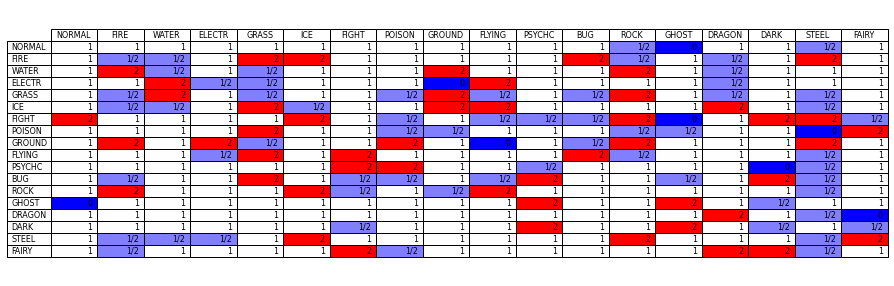

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.axis('off')

normal = plt.Normalize(vmin=0, vmax=2)
cm = plt.get_cmap('bwr')
types_str = [t.value for t in types]

dat = [[effectiveness_dict[(at, dt)] for dt in types] for at in types]
table = ax.table(
    cellText=dat,
    colLabels=types_str, rowLabels=types_str,
    loc="center",
    cellColours=cm(normal(dat).filled(np.nan).astype(float))
)

In [8]:
tbl = {
    (at, dt1, dt2): (effectiveness_dict[(at, dt1)]*effectiveness_dict[(at, dt2)])
    for at in types for dt1 in types for dt2 in types if dt1 != dt2
}

In [9]:
tbl = {
    (dt1, dt2):
        np.count_nonzero(np.array([effectiveness_dict[(at, dt1)]*effectiveness_dict[(at, dt2)] for at in types]) < 1)
        if dt1 != dt2
        else np.nan
    for dt1 in types for dt2 in types
}

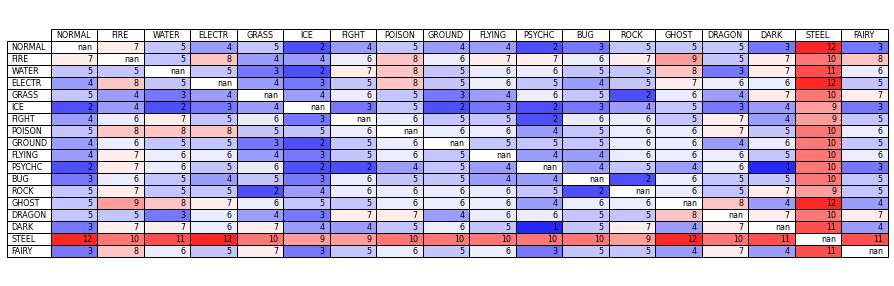

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.axis('off')

dat = [[tbl[(dt1, dt2)] for dt2 in types] for dt1 in types]
normal = plt.Normalize(vmin=np.nanmin(dat)-1, vmax=np.nanmax(dat)+1)
cm = plt.get_cmap('bwr')
types_str = [t.value for t in types]

table = ax.table(
    cellText=dat,
    colLabels=types_str, rowLabels=types_str,
    loc="center",
    cellColours=cm(normal(dat).filled(np.nan).astype(float))
)

In [11]:
wp_tbl = {
    (dt1, dt2):
        np.count_nonzero(np.array([effectiveness_dict[(at, dt1)]*effectiveness_dict[(at, dt2)] for at in types]) > 1)
        if dt1 != dt2
        else np.nan
    for dt1 in types for dt2 in types
}

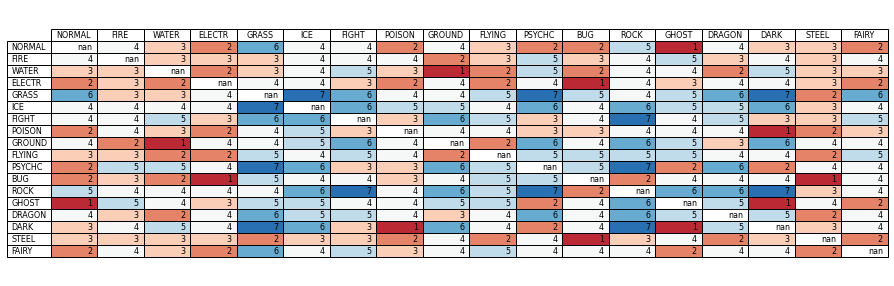

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.axis('off')

dat = [[wp_tbl[(dt1, dt2)] for dt2 in types] for dt1 in types]
normal = plt.Normalize(vmin=np.nanmin(dat)-1, vmax=np.nanmax(dat)+1)
cm = plt.get_cmap('RdBu')
types_str = [t.value for t in types]

table = ax.table(
    cellText=dat,
    colLabels=types_str, rowLabels=types_str,
    loc="center",
    cellColours=cm(normal(dat).filled(np.nan).astype(float))
)

In [13]:
np.nanmax(dat)

7.0